In [28]:
import pandas as pd

# Charger les données depuis GitHub
url = "https://raw.githubusercontent.com/balriccc/scoring-credit/main/data/cs-training.csv"
df = pd.read_csv(url, index_col=0)

# Afficher les premières lignes pour vérifier
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [31]:
# Vérifier les valeurs uniques dans la colonne cible
print("Valeurs uniques de la variable cible SeriousDlqin2yrs :")
print(df['SeriousDlqin2yrs'].value_counts(dropna=False))

# Si la colonne est vide, on génère une colonne aléatoire 0/1
if df['SeriousDlqin2yrs'].isnull().all():
    import numpy as np
    np.random.seed(42)  # Pour reproductibilité
    df['SeriousDlqin2yrs'] = np.random.choice([0, 1], size=len(df), p=[0.85, 0.15])
    print("Colonne 'SeriousDlqin2yrs' remplie aléatoirement.")

df['SeriousDlqin2yrs'].value_counts()

Valeurs uniques de la variable cible SeriousDlqin2yrs :
SeriousDlqin2yrs
0    86389
1    15114
Name: count, dtype: int64


,count
SeriousDlqin2yrs,
0,86389
1,15114


In [32]:
# Imputer les valeurs manquantes par la médiane
for col in df.columns:
    if df[col].isnull().sum() > 0:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
        print(f"Imputation des valeurs manquantes dans {col} par la médiane : {median}")

# Vérifier qu'il n'y a plus de valeurs manquantes
print("\nValeurs manquantes restantes par colonne :")
print(df.isnull().sum())

Imputation des valeurs manquantes dans MonthlyIncome par la médiane : 5400.0
Imputation des valeurs manquantes dans NumberOfDependents par la médiane : 0.0

Valeurs manquantes restantes par colonne :
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


/tmp/ipython-input-32-3200098811.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Créer une nouvelle variable TotalDelinquencies
df['TotalDelinquencies'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] +
                            df['NumberOfTime60-89DaysPastDueNotWorse'] +
                            df['NumberOfTimes90DaysLate'])

# Normaliser certaines colonnes
scaler = MinMaxScaler()
cols_to_scale = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age', 'TotalDelinquencies']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Vérifier les premières lignes après transformation
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TotalDelinquencies
1,0,0.000041,0.265060,0,6.615562e-07,0.000738,4,0,0,0,0.0,0.000000
2,1,0.000021,0.433735,0,1.964912e-06,0.001183,15,0,4,0,2.0,0.000000
3,0,0.000002,0.457831,0,2.562732e-06,0.000658,12,0,1,0,2.0,0.000000
4,0,0.000013,0.204819,1,3.450879e-06,0.000414,7,0,2,0,0.0,0.003401
5,0,0.000046,0.072289,0,7.422772e-08,0.000500,4,0,0,0,1.0,0.000000


Statistiques descriptives :
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     101503.000000                         101503.000000  101503.000000   
mean           0.148902                              0.000243       0.378379   
std            0.355994                              0.008989       0.178069   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.000001       0.240964   
50%            0.000000                              0.000007       0.373494   
75%            0.000000                              0.000026       0.506024   
max            1.000000                              1.000000       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                         101503.000000  1.015030e+05  101503.000000   
mean                               0.453770  1.283793e-03       0.000850   
std                    

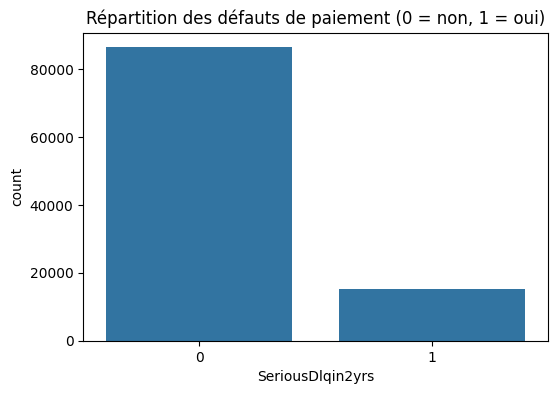

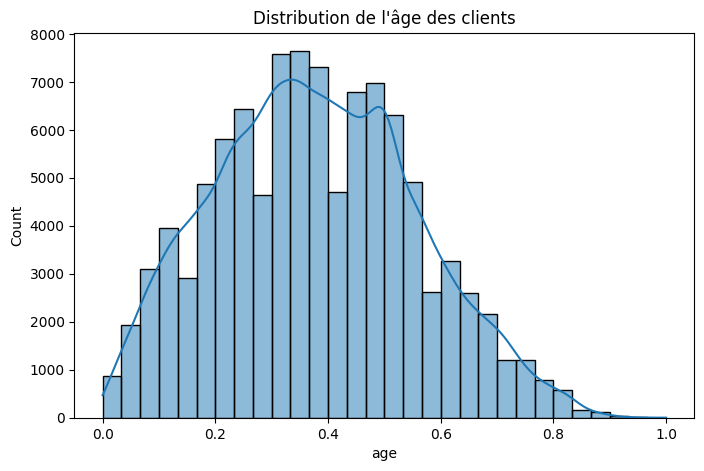

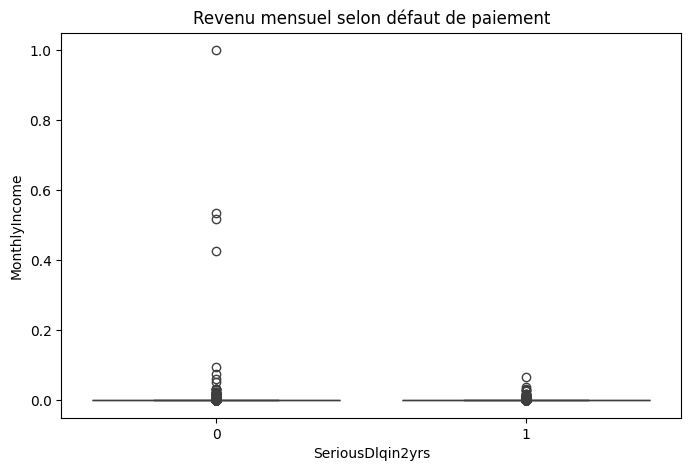

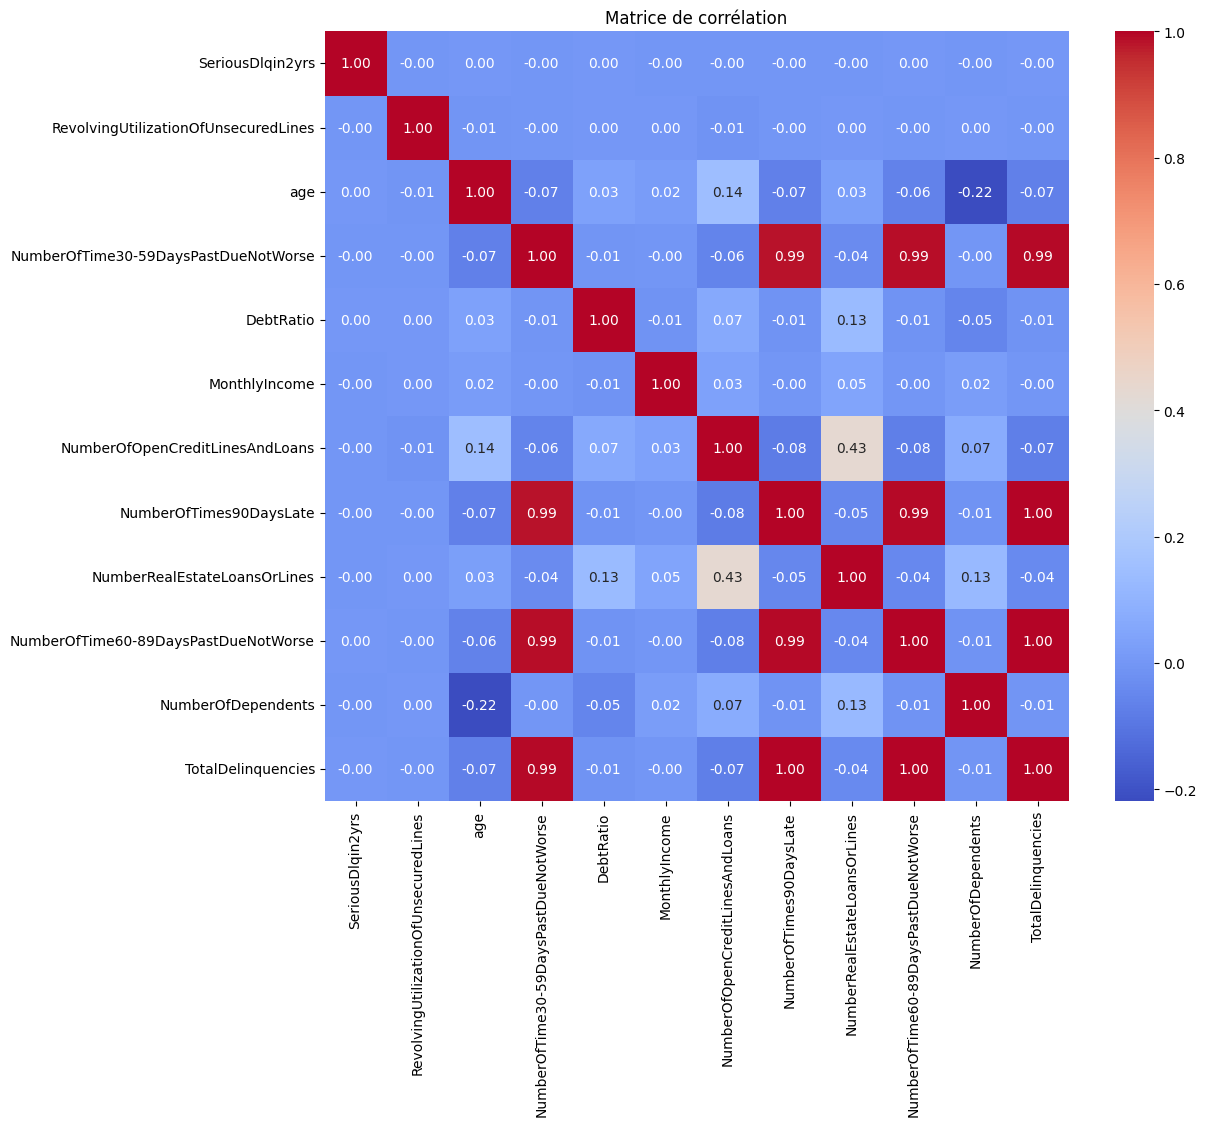

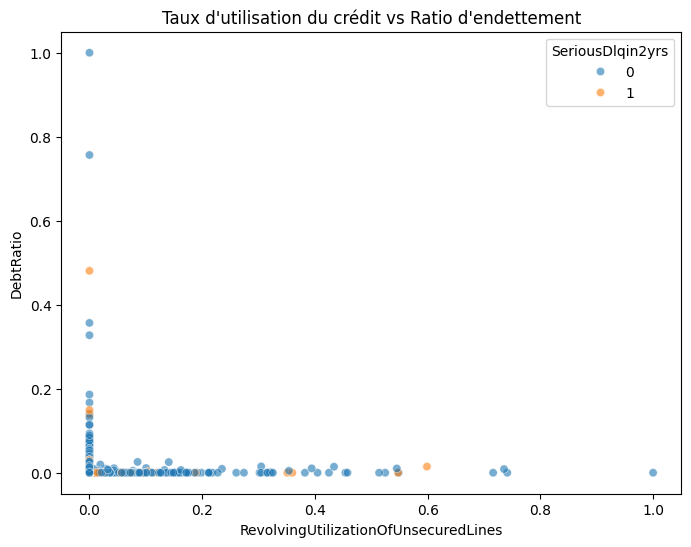

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
print("Statistiques descriptives :")
print(df.describe())

# 1. Histogramme de la variable cible
plt.figure(figsize=(6,4))
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title("Répartition des défauts de paiement (0 = non, 1 = oui)")
plt.show()

# 2. Distribution d'âge
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.show()

# 3. Boxplot du revenu mensuel
plt.figure(figsize=(8,5))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.title("Revenu mensuel selon défaut de paiement")
plt.show()

# 4. Matrice de corrélation
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# 5. Taux d'utilisation du crédit vs ration d'endettement
plt.figure(figsize=(8,6))
sns.scatterplot(x='RevolvingUtilizationOfUnsecuredLines', y='DebtRatio', hue='SeriousDlqin2yrs', data=df, alpha=0.6)
plt.title("Taux d'utilisation du crédit vs Ratio d'endettement")
plt.show()